# Stochastic

In the beginning of the modern era of finance, mainly in the 1970s and 1980s, the major goal of financial research was to come up with closed-form solutions, for, e.g., option prices given a specific financial model. The requirements have drastically changed in recent years in that not only is the correct valuation of single financial instuments important to participants in the financial markets, but also the consistent valuation of whole derivatives books. To come up with risk measures across a whole financial institution, like value-at-risk and credit valuation adjustments, one needs to take into account the whole book of the institution and all its counterparty.

## Random Numbers

In [1]:
# import packages

import math
import numpy as np
import numpy.random as npr      # import the random number generation subpackage from NumPy
from pylab import plt, mpl
import seaborn as sns

sns.set()
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

The `rand()` function returns random numbers from the open interval [0, 1) in the shape provided as a parameter to the function. The return pbject is an ndarray object.

In [2]:
# if one wants to generate from numbers from the interval [a, b)=[5, 10), one can transform the returned numbers from npr.rand()

npr.seed(100)           # Fixes the seed value for reproducibility
np.set_printoptions(precision=4) 

npr.rand(10)            # Uniformly distributed random numbers as one-dimensional ndarray object


array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [3]:
npr.rand(5, 5)      # Uniformly distributed random numbers as two-dimensional ndarray object

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [4]:
a = 5.          # lower limit
b = 10.         # and upper limit

In [5]:
npr.rand(10) * (b - a) + a      # for the transformation to another interval

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [6]:
npr.rand(5, 5) * (b - a) + a    # the same transformation for two dimensions

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

<b>Functions for single random number generation</b>
<table>
<tr>
    <th>Functions</th>
    <th>Parameters</th>
    <th>Returns/result</th>
</tr>
<tr>
    <td>rand </td>
    <td>d1, d1, ..., dn</td>
    <td>Random values in the given shape</td>
</tr>
<tr>
    <td>randn</td>
    <td>d0, d1, ..., dn</td>
    <td>A sample (or samples) from the standard normal distribution</td>
</tr>
<tr>
    <td>randint</td>
    <td>low[, high, size]</td>
    <td>Random integers from low (inclusive) to high (exlusive)</td>
</tr>
<tr>
    <td>random_integers</td>
    <td>low[, high, size]</td>
    <td>Random intergers between low and high inclusive</td>
</tr>
<tr>
    <td>random_sample</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>random</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>ranf</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>sample</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>choice</td>
    <td>a[, size, replace, p]</td>
    <td>Random sample from a given 1D array</td>
</tr>
<tr>
    <td>bytes</td>
    <td>length</td>
    <td>Random bytes</td>
</tr>
</table>

Figrue below shows the results graphically for two continuous distributions and two discrete ones.

In [7]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)          # Uniformly distributed random numbers
rn2 = npr.randint(0, 10, sample_size)   # Random integers for a given interval
rn3 = npr.sample(size=sample_size)      # Unifromly distributed random numbers

a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)   # Randomly sampled values from a finite list object

Text(0.5, 1.0, 'choice')

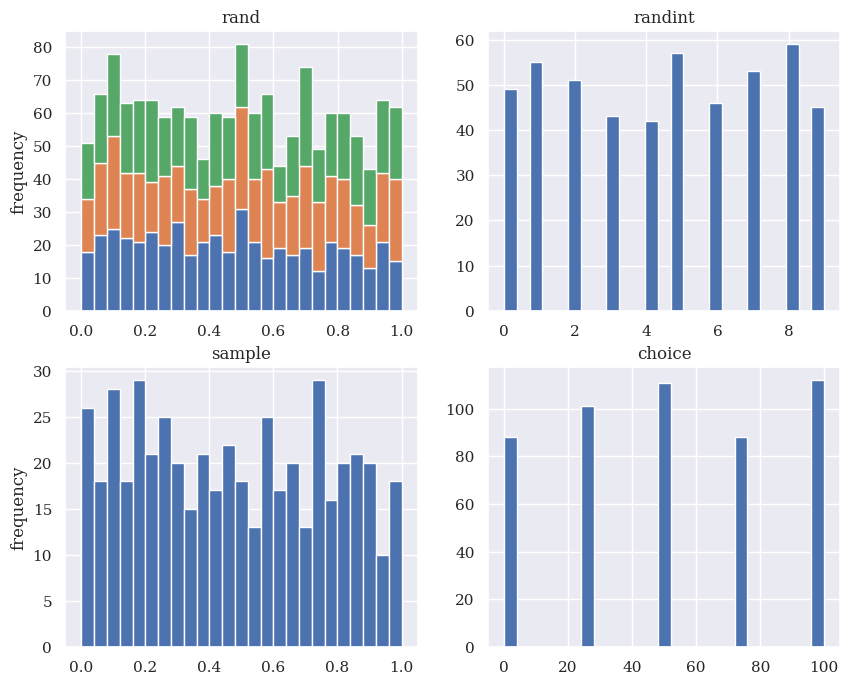

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')

<b>Functions to generate random numbers according to different distribution laws</b>

<table>
<tr>
    <th>Functions</th>
    <th>Parameters</th>
    <th>Returns/result</th>
</tr>
<tr>
    <td>beta</td>
    <td>a, b[, size]</td>
    <td>Samples for a beta distribution over [0, 1]</td>
</tr>
<tr>
    <td>binomial</td>
    <td>n, p[, size]</td>
    <td>Sample from a binomial distribution</td>
</tr>
<tr>
    <td>chisquare</td>
    <td>df[, size]</td>
    <td>Samples from a chi-square distribution</td>
</tr>
<tr>
    <td>dirichlet</td>
    <td>alpha[, size]</td>
    <td>Samples from the Dirichlet distribution</td>
</tr>
<tr>
    <td>exponential</td>
    <td>[scale, size]</td>
    <td>Samples from the exponential distribution</td>
</tr>
<tr>
    <td>f</td>
    <td>dfnum, dfden[, size]</td>
    <td>Samples from an F distribution</td>
</tr>
<tr>
    <td>gamma</td>
    <td>shape[, scale, size]</td>
    <td>Samples from a gamma distribution</td>
</tr>
<tr>
    <td>geometric</td>
    <td>p[, size]</td>
    <td>Samples form the geometric distribution</td>
</tr>
<tr>
    <td>gumbel</td>
    <td>[loc, sacle, size]</td>
    <td>Samples from a Gumbel distribution</td>
</tr>
<tr>
    <td>hypergeometric</td>
    <td>ngood, nbad, nsample[, size]</td>
    <td>Samples from a hyper geometric distribution</td>
</tr>
<tr>
    <td>laplace</td>
    <td>[loc, scale, size]</td>
    <td>Samples from the Laplace or double exponential distribution</td>
</tr>
<tr>
    <td>logistic</td>
    <td>[loc, scale, size]</td>
    <td>Samples from a logistic distribution</td>
</tr>
<tr>
    <td>lognormal</td>
    <td>[mean, sigma, size]</td>
    <td>Sample from a log-normal distribution</td>
</tr>
<tr>
    <td>logseries</td>
    <td>p[, size]</td>
    <td>Sample from a logarithmic series distribution</td>
</tr>
<tr>
    <td>multinomian</td>
    <td>n, pvals[, size]</td>
    <td>Samples from a multinomial distribution</td>
</tr>
<tr>
    <td>multivariate_normal</td>
    <td>mean, cov[, size]</td>
    <td>Samples from a multivariate normal distribution</td>
</tr>
<tr>
    <td>negative_binomial</td>
    <td>n, p[, size]</td>
    <td>Samples from a negative binomial distribution</td>
</tr>
<tr>
    <td>noncentral_chisquare</td>
    <td>df, nonc[, size]</td>
    <td>Samples from a noncentral chi-square distribution</td>
</tr>
<tr>
    <td>noncentral_f</td>
    <td>dfnum, dfden,</td>
    <td>Samples from the nonceltral F distribution</td>
</tr>
<tr>
    <td>normal</td>
    <td>[loc, scale, size]</td>
    <td>Samples from a normal (Gaussian) distribution</td>
</tr>
<tr>
    <td>pareto</td>
    <td>a[, size]</td>
    <td>Samples from a Pareto II or Lomax distribution with the specified shape
</tr>
    <td>poisson</td>
    <td>a[, size]</td>
    <td>Samples from a Poisson distribution</td>
<tr>
    <td>power</td>
    <td>a[, size]</td>
    <td>Sample in [0, 1] from a powewr distribution with positive exponent a - 1</td>
</tr>
<tr>
    <td>rayleigh</td>
    <td>[scale, size]</td>
    <td>Samples from a Rayleigh distribution</td>
</tr>
<tr>
    <td>standard_cauchy</td>
    <td>[size]</td>
    <td>Samples from standard Cauchy distribution with mode = 0</td>
</tr>
<tr>
    <td>standard_exponential</td>
    <td>[size]</td>
    <td>Samples from the standard exponential distribution</td>
</tr>
<tr>
    <td>standard_gamma</td>
    <td>shape[, size]</td>
    <td>Samples from a standard gamma distribution</td>
</tr>
<tr>
    <td>standard_normal</td>
    <td>[size]</td>
    <td>Samples from a standard normal distribution (mean = 0, stdev=1)</td>
</tr>
<tr>
    <td>standrd_t</td>
    <td>df[, size]</td>
    <td>Samples from a Student's t distribution with df degrees of freedom</td>
</tr>
<tr>
    <td>triangular</td>
    <td>left, mode, right[, size]</td>
    <td>Samples from the triangular distribution over the interval [left, right]</td>
</tr>
<tr>
    <td>uniform</td>
    <td>[low, high, size]</td>
    <td>Samples from a uniform distribution</td>
</tr>
<tr>
    <td>vomises</td>
    <td>mu, kappap[, size]</td>
    <td>Samples from a von Mises distribution</td>
</tr>
<tr>
    <td>wald</td>
    <td>mean, scale[, size]</td>
    <td>Samples froem a Wald, or inverse Gaussian, distribution</td>
</tr>
<tr>
    <td>weibull</td>
    <td>a[, size]</td>
    <td>Samples from a Weibull distribution</td>
</tr>
<tr>
    <td>zipf</td>
    <td>a[, size]</td>
    <td>Samples from a Zipf distribution</td>
</tr>
</table>

Although there is much cirticism aroung the use of (standard) normal distributions in finance, they are an indispensalbe tool and still the most widely used type of distribution.

Figure below visualizes rnadom draws from the following distributions:

- Standard normal with mean of 0 and standard deviation of 1

- Normal with mean of 100 and standard deviation of 20

- Chi square with 0.5 degree of freedom

- Poisson with lambda of 1

Three of them are continuous distribution but Poisson is discrete one. The Poisson distribution is used to simulate the arrival of (rare) external events, like a jump in the price of an instrument or an exogenic shock.

Text(0.5, 1.0, 'Poisson')

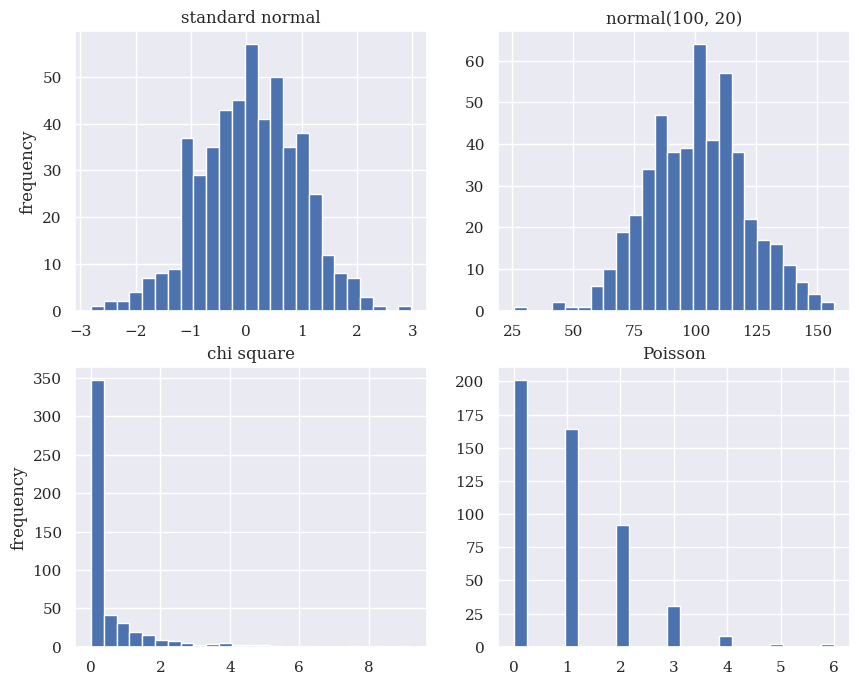

In [9]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)          # standard normally distributed random numbers
rn2 = npr.normal(100, 20, sample_size)          # Normally distributed random numbers
rn3 = npr.chisquare(df=0.5, size=sample_size)   # Chi-square disttributed random numbers
rn4 = npr.poisson(lam=1.0, size=sample_size)    # Poisson distributed numbers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')

ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')

ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')

ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

## Simulation

Monte Carlo simulation (MCS) is among the most important numerical technikques in finance.

### Random Variables

Consider the Black-Scholes-Merton setup for otpion pricing. The level of a stock index $S_T$ at a future date $T$ given a level $S_0$ as of today is given accoring to equation below.

<b>Simulating future index level in Black-Scholes-Merton setup</b>
$$S_T=S_0\exp{\left((r-\frac{1}{2}\sigma^2)T+\sigma\sqrt{T}z\right)}$$

$S_T$ : index level at date $T$

$r$ : constant riskless short rate

$\sigma$ : constant volatility (= standard deviation of returens) os $S$

$z$ : Standard normally distributed random variable

In [10]:
S0 = 100            # the initial index level
r = 0.05            # the constant riskless short rate
sigma = 0.25        # the constant volatility factor
T = 2.0             # The horizon in year fraction
I = 10000           # The number of simulations

ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))
# The simulation itself via a vectorized expression; the discretization scheme makes use of the `npr.standard_normal()`

Text(0, 0.5, 'frequency')

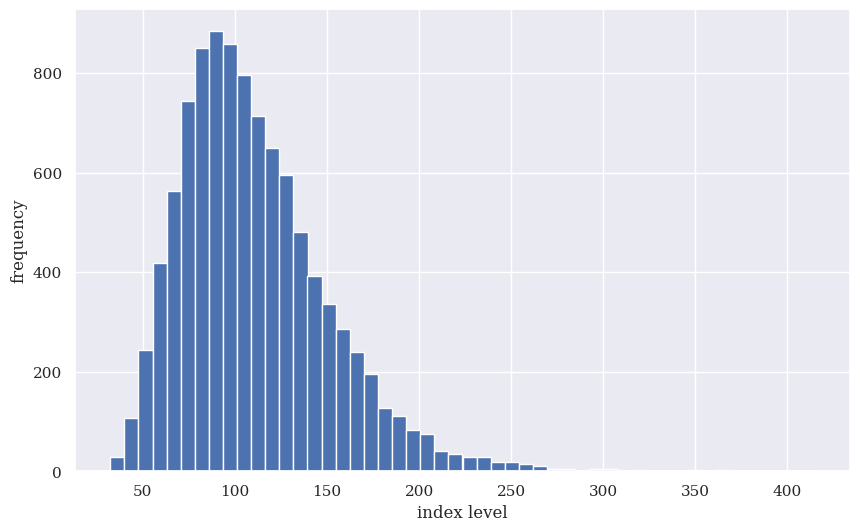

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Figure above suggests that the distribution of the random variable is log-normal. One could therefore also try to use the `npr.lognormal()` function to directly derive the values for the random variable.

In [12]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * math.sqrt(T), size=I)  
# The simulation itself via a vectorized expression; the discretization scheme makes use of the `npr.lognormal()`

Text(0, 0.5, 'frequency')

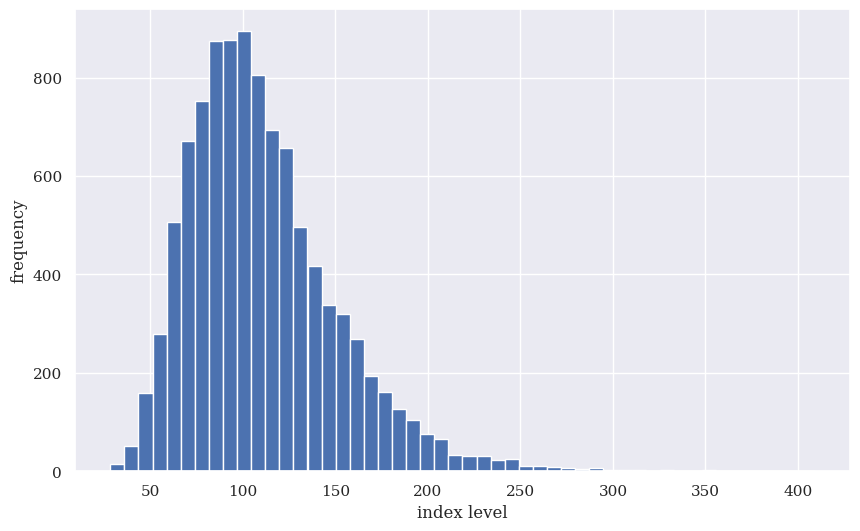

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

To compare the distributional characteristics of simulation results, the `scipy.stats` subpackage and the helper function `print_statistics()` prove useful.

In [14]:
import scipy.stats as scs

def print_statistics(a1, a2):
    ''' Prints selected statistics.

    Parameters
    ==========
    a1, a2 : ndarray objects 
        results objects from simulation

    '''

    sta1 = scs.describe(a1)         # the scs.describe() function gives back important statistics for a data set.  
    sta2 = scs.describe(a2)         

    print('%14s %14s %14s' % ('statistics', 'data set 1', 'data set 2'))
    print(45 * '-')
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

    # Skewness is a measure of the degree of asymmetry in a distribution. A perfectly symmetrical distribution has zero skewness. If a distribution has a longer tail on the right side, it is said to be positively skewed, while a longer tail on the left side indicates negative skewness.
    # Kurtosis measures the degree of peakedness or flatness of a distribution. A normal distribution has a kurtosis of 3, and a distribution with a kurtosis greater than 3 is said to be leptokurtic, meaning it has a more peaked distribution. A distribution with a kurtosis less than 3 is said to be platykurtic, indicating a flatter and wider distribution.
    # Normality is a property of a distribution where the data is symmetric and bell-shaped, with the mean, median, and mode all being equal.

In [15]:
print_statistics(ST1, ST2)

    statistics     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


The statistics of both simulation results are quite similar. The differences are mainly due to what is called the sampling error in simulation. Another error can also be introduced when discretely simulating continuous stochastic processes - namely the discretization error, which plays no role here due to the static nature of the simulation approach.

### Stochastic Processes

A stochastic process is a sequence of random variables. One should expect something similar to a sequence of repeated simulatons of a random variable when simulating a process. This is mainly true, apart from the fact that the draws are typically not independent byt rather depend on the results of the provious draws. In general, however, stochastic processes used in finance exhibits the Markov property, which mainly says that tomorrow's value of the process only depends on today's state of the process, and not any other more 'historic' state or even the whole path history.

#### Geometric Brownian motion

Consider now the Black-Schole-Merton model in its dynamic form as described by the stochastic differential equation (SDE) as below. The SDE is called a geometric Brownian motion.

<b>Stochastic differential equation in Black-Scholes-Merton setup</b>

$$dS_t = rS_tdt + \sigma S_dZ_t$$

$dS_t$ : the change in the price of the asset over a short period of time

$S_t$ : the current price of the asset

$r$ : the expected return on the asset

$dt$ : the length of the time interval

$\sigma$ : the volatility of the asset

$Z_t$ : stanadard Brownian motion

$dZ_t$ : a random variable representing the change in the asset's value, which is assumed to follow a normal distribution.

The values of $S_t$ are log-normally distributed and returns $\frac{dS_t}{S_t}$ normally. The first term $rS_tdt$, represents the deterministic component of model, which is the expected return on the asset over a given time period. The second term, $\sigma S_dz_t$, represents the stochastic of the model, which is the random fluctuation in the asset's value over the same period time.

The GBM model assumes that the stochastic component of the model follows a normal distribution with a mean of zero and a standard deviation of $\sigma$. This means that the asset's value will fluctuate randomly around its expected return, with larger fluctuation occuring when the asset is more volatile.

The SDE in equation aboce can be discretized exactly by an Euler scheme, with $\triangle t$ being the fixed discretization intervsal and $z_t$ being a standard normally distributed random variable.

<b>Simulating index levels dynamically in Black-Scholes-Merton setup</b>
$$S_t = S_{t-\triangle t}\exp\left((r-\frac{1}{2}\sigma^2)\triangle t+\sigma\sqrt{\triangle t}z_t\right)$$

In [16]:
I = 10000           # The number of paths to be simulated
M = 50              # The number of time intervals for the discretization
dt = T / M          # The length of the time interval in year fractions
S = np.zeros((M + 1, I))    # The two-dimensional ndarray object for the index levels
S[0] = S0           # The initial values for the initial point in time t = 0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * npr.standard_normal(I))
    # The simulation via semivectorized expression; the loop is over the points in time starting at t = 1 and ending at t = T

Text(0, 0.5, 'frequency')

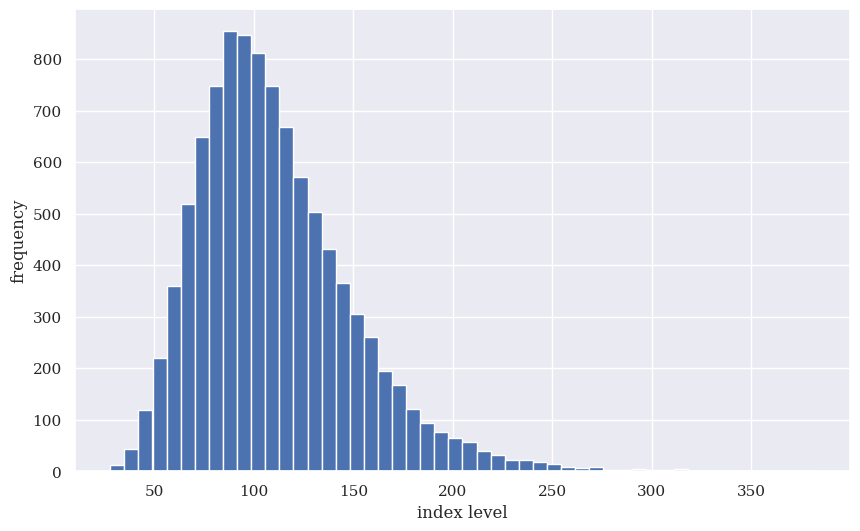

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [18]:
print_statistics(S[-1], ST2)

    statistics     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.423        110.431
           std         39.179         39.878
          skew          1.069          1.115
      kurtosis          2.028          2.217


Text(0, 0.5, 'index level')

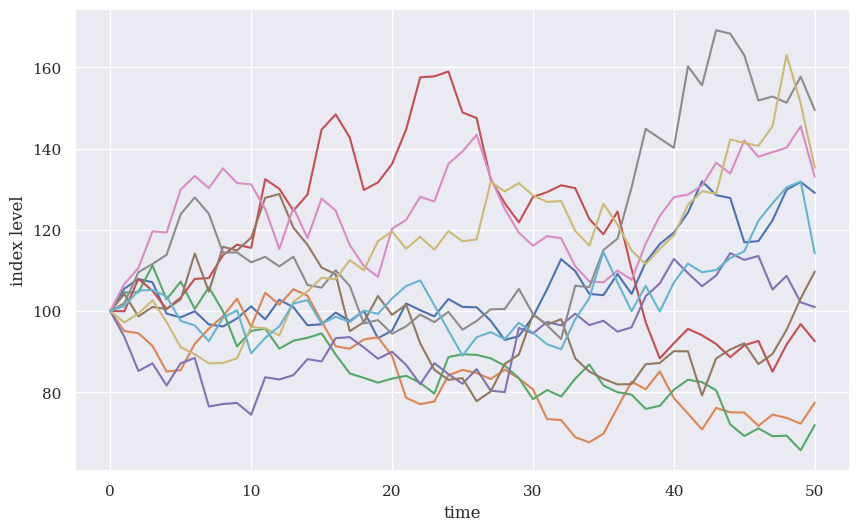

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Using the dynamic simulation approach not only allows us to visualize pahts, but also to value options with Americal/Bermudan exercise or options whose payoff is path-dependent.

#### Square-root diffusion

Another important class of financial processes is mean-reverting processes, which are used to model short rates or voilatility processes. A popular and widely used model is the square-root diffusion.

Mean-revering process refers to a tendency for a series to return to a long-term average or mean value after experiencing a temporary deviation from that value.

<b>Stochastic differential equation for square-root diffusion</b>

$$dx_t=\kappa(\theta-x_t)dt +\sigma\sqrt{x_t}dZ_t$$

$x_t$ : process level at date $t$

$\kappa$ : mean-revering factor

$\theta$ : long-term mean of the process

$\sigma$ : constant volatility parameter

$Z_t$ : standard Brownian motion

It is well known that the values of $x_t$ are chi-squared distributed. However, many financial models can be discretized and approximated by using the normal distribution. While the Euler scheme is exact for the geometric Brownian motion, it is biased for the majority of other stochastic processes. Even if there is an exact scheme available (e.g., the square-root diffusion), the use of an Euler scheme might be desirable for numerical and/or computational reasons.

<b>Euler discretrization for square-root diffusion</b>

$\tilde{x}_t=\tilde{x}_s+\kappa(\theta-\tilde{x}_s^+)\triangle t + \sigma{\sqrt{x_s}^+}\sqrt{\triangle t}z_t$

$s=t-\triangle t$

$x^+\equiv \max(x,0)$

$x_t=\tilde{x}_t^+$

The square-root diffusion has the convenient and realistic characteristic that the value of $x_t$ remain strictly positive. When discretizing it by an Euler scheme, negative values cannot be excluded. That is the reason why one works always with the positive verison of the originally simulated process.


In [20]:
x0 = 0.05           # the initial value (e.g., for short rate)
kappa = 3.0         # the mean reveting factor
theta = 0.02        # the long-term mean value
sigma = 0.1         # the volatility factor
I = 10000
M = 50
dt = T / M

def srd_euler():
    xh = np.zeros((M + 1, I))       # np.zeros() is used to create a new array
    x = np.zeros_like(xh)           # np.zeros_like() is used to create a new array that has the same shape and data type as an argument array
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * math.sqrt(dt) * npr.standard_normal(I))
        # The simulation based on an Euler scheme
    x = np.maximum(xh, 0)
    return x

x1 = srd_euler()


Text(0, 0.5, 'frequency')

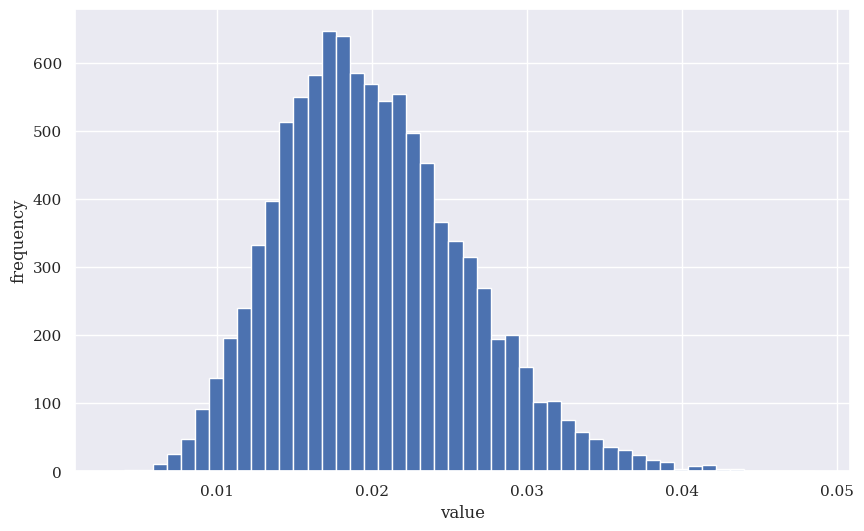

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Figure below shows the first 10 simulated paths, illustraing the resulting negative average drift (due to $x_0>\theta$) and the convergence to $\theta=0.02$.

Text(0, 0.5, 'index level')

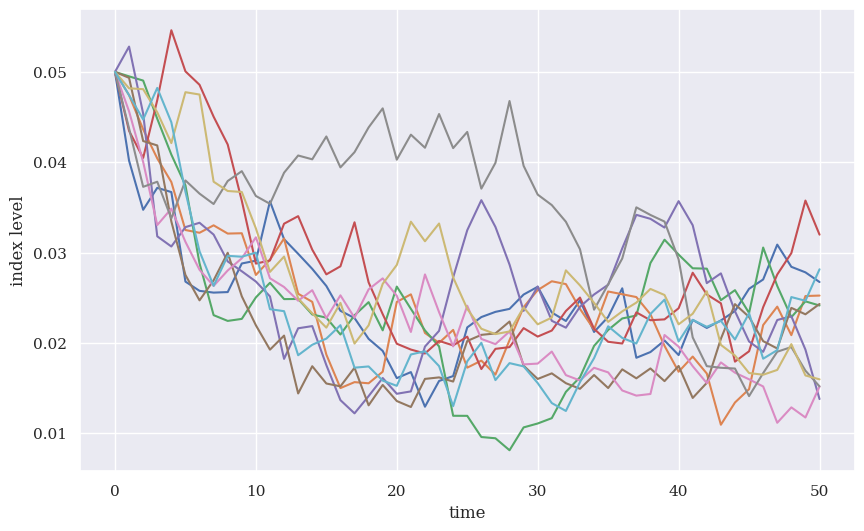

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Equation below presents the exact discretization scheme for the square-root diffution based on the noncentral chi-square distribution $x_d'^2$ with $df=\frac{4\theta \kappa}{\sigma^2}$ degree of freedom and noncetrality parameter $nc=\frac{4\kappa e^{-\kappa\triangle t}}{\sigma^2(1-e^{-\kappa\triangle t})}x_S$.

<b>Exact discretization for square-root diffusion</b>

$$x_t=\frac{\sigma^2(1-e^{-\kappa\triangle t})}{4\kappa}x_d'^2\left(\frac{4\kappa e^{-\kappa\triangle t}}{\sigma^2(1-e^{-\kappa\triangle t})}x_S\right)$$

In [23]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 8 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    
    return x

x2 = srd_exact()


Text(0, 0.5, 'frequency')

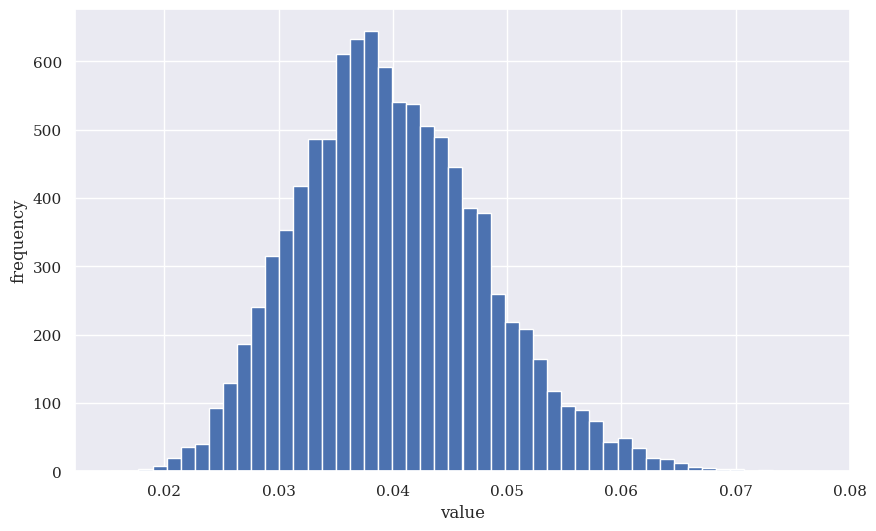

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Figure below presents the first 10 simulatged paths, again displaying the negative average drift and the convergence to $\theta$.

Text(0, 0.5, 'index level')

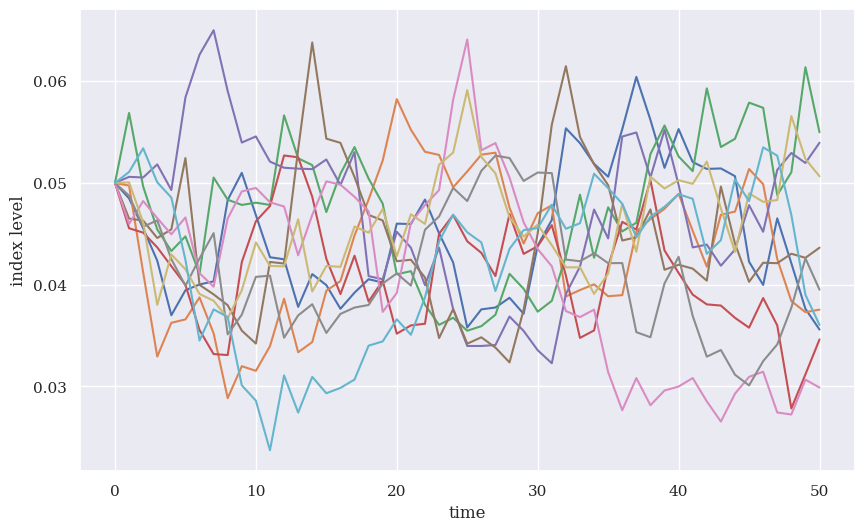

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [26]:
print_statistics(x1[-1], x2[-1])

    statistics     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.003          0.015
           max          0.049          0.077
          mean          0.020          0.040
           std          0.006          0.008
          skew          0.529          0.391
      kurtosis          0.289          0.132


Comparing the main statistics from the different approaces reveals that the biased Euler scheme indeed performs quite well when it comes to the desired statistical properties.

In [27]:
I = 250000
%time x1 = srd_euler()

CPU times: user 481 ms, sys: 71.9 ms, total: 553 ms
Wall time: 534 ms


In [28]:
%time x2 = srd_exact()

CPU times: user 987 ms, sys: 3.99 ms, total: 991 ms
Wall time: 990 ms


In [29]:
print_statistics(x1[-1], x2[-1])

    statistics     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.003          0.013
           max          0.058          0.087
          mean          0.020          0.040
           std          0.006          0.008
          skew          0.559          0.406
      kurtosis          0.449          0.255


A mjor difference can be obeserved in terms of execution speed, since sampling from the noncentral chi-square distribution is more computationally demanding than from the standard normal distribution.

#### Stochastic volatility

Volatility in genetal is neither constant nor deterministic - it is stochastic. A mojor advancement with regrad to financial modeling was achieved in the early 1990s with the intrdocution of so-called stochastic volitility models. One of the most popular models is that of Heston (1993).

<b>Stochastic differential equations for Heston stochastic volatility model</b>

$$dS_t=rS_tdr+\sqrt{v_t}S_tdZ_t^1$$
$$dv_t=\kappa_v(\theta_v-v_t)dt +\sigma_v\sqrt{v_t}dZ_t^2$$
$$dZ_t^1dZ_t^2=\rho$$

The meaning of the variables and parameters can now be inferred easily from the discussion of the geometric Brownian motion and the square-root diffusion. The parameter $\rho$ represents the instantaneous correlation between the two standard Brownian motion $Z_t^1$, $Z_t^2$. This allows us to account for a stylized fact called the leverage effect, which states that volatility goes up in times of stress (declining markets) and goes down in times of bull market (rising markets).

To account for the correlation between the stochastic processes, one needs to determine the Cholesky decomposition of the correlation matrix.

Cholesky decomposition of a correlation matrix is a mathematical technique used to decompose a correlation matrix into a lower triangular matrix and its transpose. This decomposition is used in various statistical and machine learning applications, particularly in portfolio optimization and risk management.

In [30]:
S0 = 100.
r = 0.05 
v0 = 0.1            # initial (instaneous) volatility value
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6           # fixed correlation between the two Brownian motions
T = 1.0

In [31]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]

cho_mat = np.linalg.cholesky(corr_mat)      # Cholesky decomposition and resulting matrix
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [32]:
# looking to use set 0 for the index process
# set 1 for the volatility process
# for the volatility process modeled by a square-root diffusion, the Euler scheme is chosen
# taking into account the correlation via the Cholesky matrix

M = 50
I = 10000
dt = T / M 

ran_num = npr.standard_normal((2, M + 1, I))

v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)

In [33]:
v[0] = v0
vh[0] = v0

In [34]:
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])     # M : time interval
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * math.sqrt(dt) * ran[1])
    # simluates the paths based on an Euler scheme

In [35]:
v = np.maximum(vh, 0)

Text(0.5, 0, 'volatility')

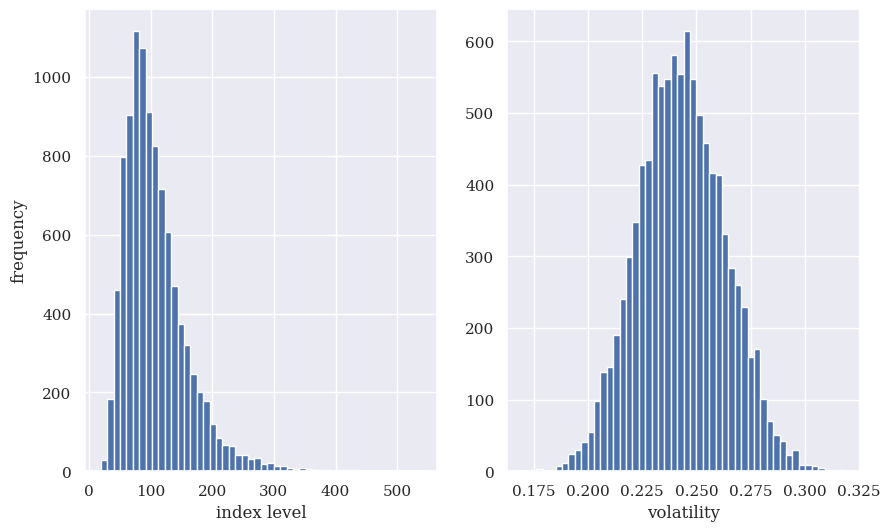

In [36]:
# The simulation of the index level process takes into account the correlation
# and uses the exact Euler scheme for the geometric Brownian motion.
# Figure shows the simulation retulsts at maturity as a histogram for both the index level process and the volatility process.

S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')

ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')

This illustrates another advantage of working with the Euler scheme for the square-root diffusion: correlation is easily and consistently accounted for since one only draws standard distributed random numbers.

An inspection of the first 10 simulated path of each process shows that the volatility process is drifting positively on average and that it converges to $\theta=0.25$.

In [37]:
print_statistics(S[-1], v[-1])

    statistics     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         19.223          0.170
           max        538.502          0.318
          mean        107.875          0.243
           std         51.578          0.020
          skew          1.602          0.095
      kurtosis          4.457         -0.128


Text(0, 0.5, 'volatility')

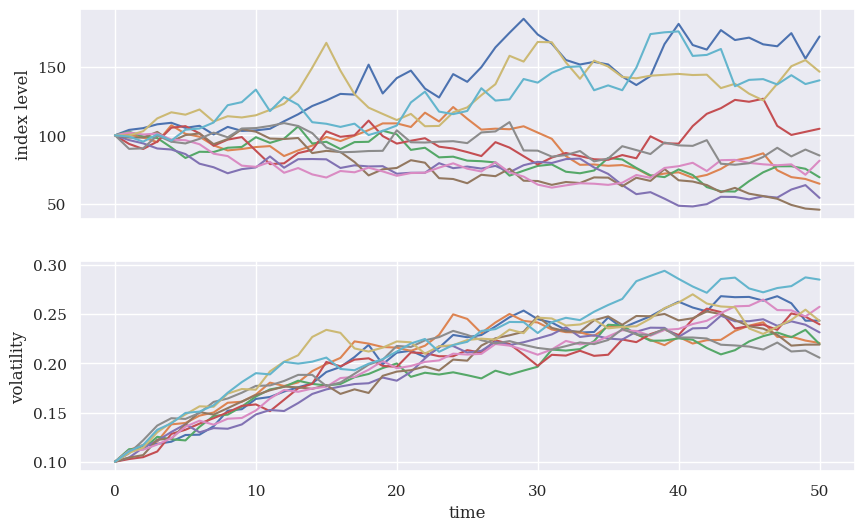

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')

ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')

Having a brief look at the statistics for the maturity date for both data sets reveals a pretty high maximum value for the index level process. In fact, this is much higher than a geometric Brownian motion with constant volatility could ever climb, ceteris paribus (all other things being equa).

#### Jump diffusion

Stochastic volatility and the leverage effect are stylized (empirical) facts found in a number of markets. Another important stylized fact is the existence of jumps in asset prices and volatility. In 1976, Merton published his jump diffusion model, enhancing the Black-Scholes-Merton setup through a model component generating jumps with log-normal distribution.

<b>Stochastic differential equation for Merton jump diffusional model</b>

$$dS_t = (r-r_j)S_tdt+\sigma S_tdZ_t+J_tS_tdN_t$$

$S_t$ : Index level at date $t$

$r$ : Constant riskless short rate

$r_j\equiv \lambda \cdot \left(e^{\mu_f+\delta^2/2}-1\right)$ : Drift correlation for jump to maintain risk neutrality

$\sigma$ : Constant volatility of $S$

$Z_t$ : Standard Brownian motion

$J_t$ : Jump at date $t$ with distribution...
- $\log(1+J_t)\approx \mathbf{N}\left(\log(1+\mu_J)-\frac{\delta^2}{2}, \delta^2\right)$
- $\mathbf{N}$ : the cumulative distribution function of a standard normal random variable

$N_t$ : Poisson process with intensity $\lambda$

<b>Euler discretization for Meron jump diffusion model</b>

$$S_t = S_{t-\triangle t}\left(e^{(r-r_f-\sigma^2/2)\triangle t +\sigma\sqrt{\triangle t}z_t^1}+\left(e^{\mu_j+\delta z_t^2}-1\right)y_t\right)$$

In [39]:
S0 = 100. 
r = 0.05
sigma = 0.2 
lamb = 0.75         # the jump intensity
mu = -0.6           # the mean jump size
delta = 0.25        # the jump volatility
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)       # the drift correction

Text(0, 0.5, 'frequency')

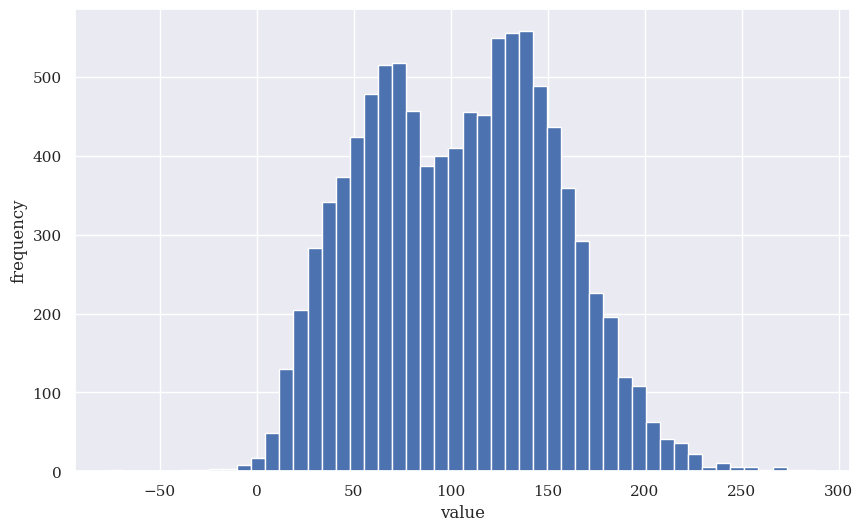

In [40]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))       # standard noramlly distributed random numbers
poi = npr.poisson(lamb * dt, (M + 1, I))    # Poisson distributed random numbers

for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj -0.5 * sigma ** 2) *dt + sigma * math.sqrt(dt) * sn1[t]) + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    # simulation based on the exact Euler scheme

plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

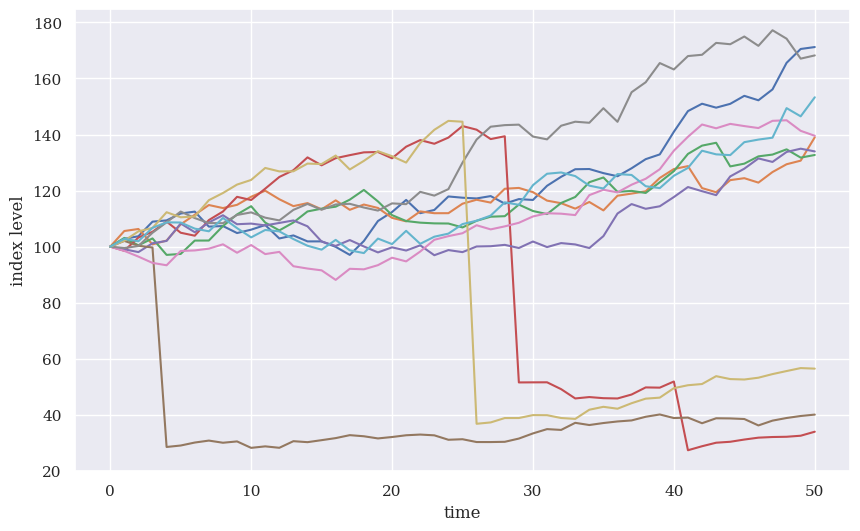

In [41]:
# the negative jumps can also be spotted in the first 10 simulated index level paths

plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

### Variance Reduction

Because the Python functions generate pseudo-random numbers and due to the varying sizes of the samples drawn, the resulting sets of numbers might not exhibit statistics close enough to be expected or desired ones.

In [42]:
# one would expect a set of standard normally distributed random numbers to show a mean of 0 and a standard deviation of 1. 
# let us check what statistic different sets of random number exhibit

print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)

    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [43]:
i ** 2 * 10000

8410000

There are easy-to-implement, generic variance reduction technique available improve the matching of the first two moments of the (standard) normal distribution. The first technique is to use antithetic variates. This approach simply draws only half trhe desired number of random draws, and adds the same set of random numbers with the opposite sign afterward.

In [44]:
sn = npr.standard_normal(int(10000 / 2))

sn = np.concatenate((sn, -sn))          # this concatenates the two ndarray objects

np.shape(sn)                    # to arrive the desired number of random numbers

(10000,)

In [49]:
sn.mean()           # the resulting mean value is zero (within standard floating-point arithmetic errors)

-1.4341810867452677e-19

In [50]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
-0.000000000000  1.000113464185
-0.000000000000  0.999435175324
-0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


However, this approach does not have any influence on the second moment, the standard deviation. Uning another reduction technique, called moment matching, helps correct in one step both the first and second moments.

In [51]:
sn = npr.standard_normal(10000)

sn.mean()

-0.001165998295162494

In [52]:
sn.std()

0.991255920204605

In [58]:
sn_new = (sn - sn.mean()) / sn.std()        # Correct both the first and second moment in a single step

In [59]:
sn_new.mean()

-2.3803181647963357e-17

In [60]:
sn_new.std()

0.9999999999999999

This technique ensures that the set of random numbers matches the desired first and second momnet of the standard normal distribution perfectly.

The following function utilizes the insight with regrad to variance reduction techniques and generates standard normal random numbers for process simulation using either two, one, or no variance reduction techniques.

In [65]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simuation
    
    Parameters
    ==========
    M : int
        number of time intervals for discretization
    I : int
        number of paths to be simulated
    anti_paths : boolean
        use of moment matching
    
    '''

    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    
    else:
        sn = npr.standard_normal((M + 1, i))
    
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    
    return sn


## Valuation

One of the most important applications of Monte Carlo simulation is the variation of contigent claims (options, derivatives, hybrid instruments, etc). In a risk-neutral world, the value of a contingent claim is the discounted expected payoff under the risk-nuetral (martingale) measure. This is the probability measure that makes all risk factors (stocks, indices, etc.) drift at the riskless short rate, making the discounted processes martingales.


[Appendix] a martingale is a stochastic process in which the expected value of the future value of the process is equal to its current value, given the current information. In other words, a martingale process has no predictable trends and the future behavior of the process is independent of its past behavior.

### European Options

The payoff of a European call option on an index at maturity is given by $h(S_T)\equiv \max(S_T-K, 0)$, where $S_T$ is the index level at maturity date $T$ and $K$ is the strike price. The risk-neutral measure for the relevant stochastic process (e.g., geometric Brownian motion), the price of such an option is given by the formual in euation below

<b>Pricing by risk-nuetral expection</b>

$$C_0=e^{-rT}\mathbf{E}_0^{Q}(h(S_T))=e^{-rT}\int_0^{\infty}h(s)q(s)ds$$

Equation below provides the respective Monte Carlo estimator for the European option, where $\tilde{S}^i_T$ iS the $T$th simulated index level at maturity.

<b>Risk-neutral Monte Carlo estimator</b>

$$\tilde{C}_0=e^{-rT}\frac{1}{I}\sum_{i=1}^I h(\tilde{S_T^i})$$

In [66]:
# Consider the following parameterization for the geometric Brownian motion and valuation fucntion `gbm_mcs_stat()`
# taking as a parameter only the striker price. Consider the case with a strike price of `K = 105`.

S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

def gbm_mcs_stat(K):
    ''' Valuation of European call option in black-shcoles-merton
    by Monte Carlo simulation (of index level at maturity)

    Paremeters
    ==========
    K : float
        (positive) strike price of the option
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''

    sn = gen_sn(1, I)
    
    # simulated index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * sn[1])

    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)

    # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)

    return C0

In [67]:
gbm_mcs_stat(K=105.)        # The Monte Carlo simulation value for the European call option.

10.044221852841922

Consider the dynamic simulation approach and allow for European put options in addition to the call option.

In [68]:
M = 50              # The number of time intervals for the discretization

def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    option: string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    
    '''

    dt = T / M

    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0 
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
    
    # case-based calcalation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    
    # calculation of MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)

    return C0


In [71]:
gbm_mcs_dyna(K=110., option='call')     # The Monte Carlo estimator value for the European call option

7.975759740452857

In [72]:
gbm_mcs_dyna(K=110., option='put')          # The monte Carlo estimator value for the European put option

12.621924561631264

The question is how well these simulation-based valuation approaches perform relative to the benchmark value from the Black-Scholes-Merton valuation formula.

First, we compare the results from the static simulation approach with precise analytical values.

(75.0, 125.0)

<Figure size 1000x600 with 0 Axes>

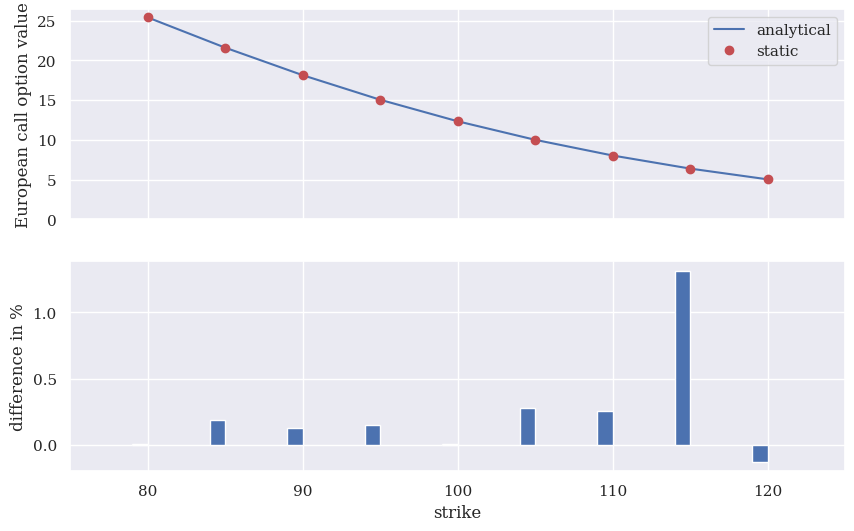

In [75]:
from bsm_functions import bsm_call_value

stat_res = []
dyna_res = []
anal_res = []           # instantiates empty list objects to collect the results

k_list = np.arange(80., 120.1, 5.)      # creates an ndarray object containing the range of strikle prices
np.random.seed(100)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))     # Simulates/calculates and collects the option values for all strike prices

stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)       # transform the list object to ndarray objects

# figure shows the reuslts. All valuation differences are smaller than 1% absolutely.

plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)

(75.0, 125.0)

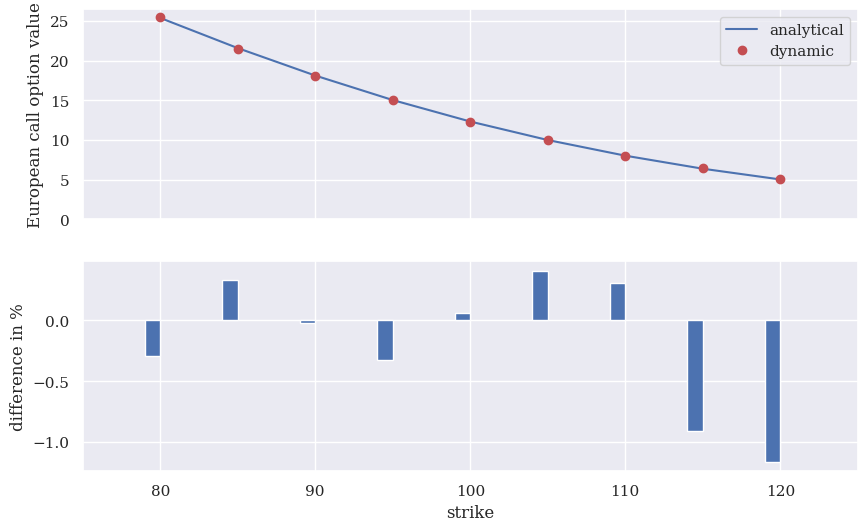

In [76]:
# all valuation differences are samller than 1% absolutely for the dynamic simuation and valuation.
# As a general rule, the quality of the Monte Carlo estimator can be controlled for by adjusting the number of time intervals M used and/or the number of paths I simulated.

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)

### American Option

The value of Americal options is more involved compared to European options. An optimal stopping problem has to be solved to come up with a fair value of the option.

The problem formulation is already based on a discrete time grid for use with numerical simulation. It is more correct to speak of an option value given Bermudan exerciese. For the time inteval converging to zero length, the value of the Bermudan option converges to the one of the American option.

<b>American option prices as optimal stopping problem</b>
$$V_0=\underset{\tau\in\{0, \triangle t, 2\triangle t, ..., ,T\}} \sup e^{-rT}\mathbf{E}_0^Q(h_{\tau}(S_{\tau}))$$

Least-Squares Monte Carlo (LSM) can be shown that the value of the American (Bermudan) option at any given date $t$ is given $V_t(s)=\max(h_t(s),C_t(s))$, where $C_t(s)=\mathbf{E}_t^Q(e^{-r\triangle t}V_{t+\triangle t}(S_{t+\triangle t})|S_t=s)$ is the continuation value of the option given an index level of $S_t=s$.


[Appendix] Bermudan options are similar to American options in that they can be exercised early, but differ in that the exercise is only allowed at specified exercise dates. The holder of a Bermudan option can choose to exercise the option on any one of these specified dates until expiration.



Consider now that we have simulated $I$ paths of the index level over $M$ time intervals of equal size $\triangle t$. Define $Y_{t,i}\equiv e^{-r\triangle t}V_{t+\triangle t,i}$ to be simulated coninuation value for path $i$ at time $t$. We cannot use this number directly because it would imply perfect foresight. However, we can use the cross section of all such simulated continuation values to estimate the (expected) continuation value by least-sqaures regression.

Given a set of basis functions $b_d,d=1, \cdots, D$, the continuation value is then given by the regression estimate $\hat{C}_{t,i}=\sum_{d=1}^D\alpha_{d,t}^*\cdotb_d(S_{t,i})$, where the optimal regression parameters $\alpha^*$ are the solution of the least-squares problem.

<b>Least-squares regression for American option valuation</b>
$$\underset{\alpha_{1,t}, \cdots, \alpha_{D,t}}\min \frac{1}{I} \sum_{i=1}^I (Y_{t,i}-\sum_{d=1}^D\alpha_{d,t}\cdot b_d(S_{t,i}))^2$$ 


In [79]:
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simuation by LSM algorithm
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    

    Returns
    =======
    C0 : float
        estimated present value of American call option
    '''

    dt = T / M
    df = math.exp(-r * dt)

    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
    
    # case based calculattion of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)

    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)

        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])

        # MCS estimator
    C0 = df * np.mean(V[1])
    return C0 

In [80]:
gbm_mcs_amer(110., option='call')

7.810714548188456

In [81]:
gbm_mcs_amer(110., option='put')

13.661853293823604

The European value of an option represents a lower bound to the American option's value. The differene is generally called the earl exercise premium.

In [86]:
# compare Europan and American option values for the same range of strikes

euro_res = []
amer_res = []

k_list = np.arange(80., 120.1, 5.)
print(k_list)

for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))

euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

[ 80.  85.  90.  95. 100. 105. 110. 115. 120.]


(75.0, 125.0)

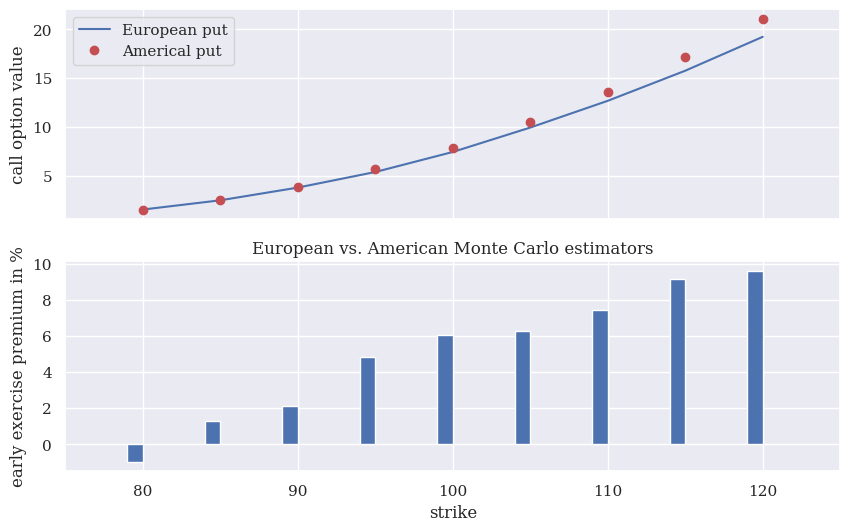

In [97]:
# figure shows that for the range of strikes chosen the early exercise premium can rise to up to 10%.

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
plt.title('European vs. American Monte Carlo estimators')
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='Americal put')
ax1.set_ylabel('call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125)

## Risk Measures

Risk management is another important application area of stochastic methods and simulation.

### Value-at-Risk

Value-at-risk(VaR) is one of the most widely used risk measures, and a much debated one. Loved by practitioners for its intuitive appeal. it is widely discussed and criticized by many - mainly on theroretical grounds, with regrad to its limited ability to capture what is called tail risk.

VaR is a number denoted in currency units (e.g., USD, EUR, JPY) indicating a loss (of a portfolio) that is not exceeded with some confidence level (probability) over a given period of time.

Assume the Black-Schole-Merton setup and consider the following parameterization and simulation of index levels at a future date $T=30/365$ (a period of 30 days). The simulation of VaR figures requires the simulated absolute profits and losses relative to the value of the position today in a sorted manner from the severest loss to the largest profit.

In [88]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

Text(0, 0.5, 'frequency')

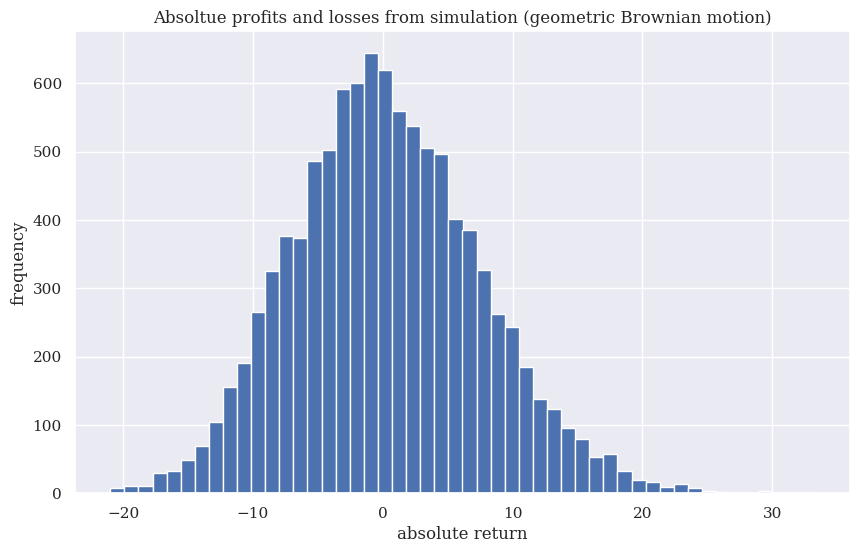

In [95]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I)) 
# simulates end-of-period values for the geometric Brownian motion

R_gbm = np.sort(ST - S0)    # calculates the absolute profits and losses per simulation run and sorts the values

plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.title('Absoltue profits and losses from simulation (geometric Brownian motion)')
plt.xlabel('absolute return')
plt.ylabel('frequency')

The `scs.scoreatorecentile()` function already does the trick. All one has to do is to define the percentiles of interest. In the `list` object `percs`, 0.1 translates into a confidence level of 100% - 0.1% = 99.9%.

In [90]:
# VaR given a confidence level of 99.8% in this case is 18.8 currency units, 
# while it is 8.5 at the 90% confidence levle

percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]

var = scs.scoreatpercentile(R_gbm, percs)

print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.2f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99            24.15
           99.90            20.06
           99.00            15.53
           97.50            13.47
           95.00            11.17
           90.00             8.74


Recakk the jump diffusion setup from Merton, which is simulated by dynamically. In this case, with the jump component having a negative mean, one sees somthing like a bimodal distribution for the simulated profits/losses in figure below. From a normal distribution point of view, one sees a pronounced left fat tail.

In [91]:
dt = 30. / 365/ M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [92]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))

for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn1[t]) + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)

R_jd = np.sort(S[-1] - S0)

Text(0, 0.5, 'frequency')

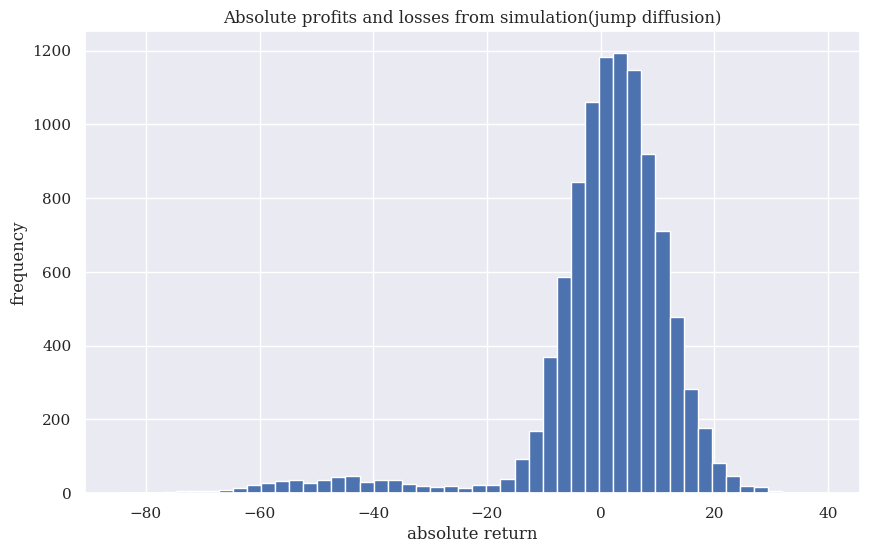

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.title('Absolute profits and losses from simulation(jump diffusion)')
plt.xlabel('absolute return')
plt.ylabel('frequency')

For this process and parametization, the VaR over 30 days at eh 90% level is almost identical as with the geometric Brownian motion, while it is more than three times as high at the 99.9% level (70 vs. 18.8 currency units)

In [98]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]

var = scs.scoreatpercentile(R_jd, percs)

print('%16s %16s' % ('Confidence level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.2f' % (100 - pair[0], -pair[1]))

Confidence level    Value-at-Risk
---------------------------------
           99.99            80.96
           99.90            73.50
           99.00            57.05
           97.50            46.60
           95.00            26.27
           90.00             9.17


This illustrates the problem of capturing the tail risk so often encountered in financial markets by the standard VaR measure.

To further illustrate the point, figure below shows the VaR measures for both cases in direct comparison graphically. As the plot reveals, the VaR measures behave completely differently given a range of typical confidence levels.

In [99]:
percs = list(np.arange(0.0, 10.1, 0.1))

gbm_var = scs.scoreatpercentile(R_gbm, percs)

jd_var = scs.scoreatpercentile(R_jd, percs)

(-88.32899653885075, 0.0)

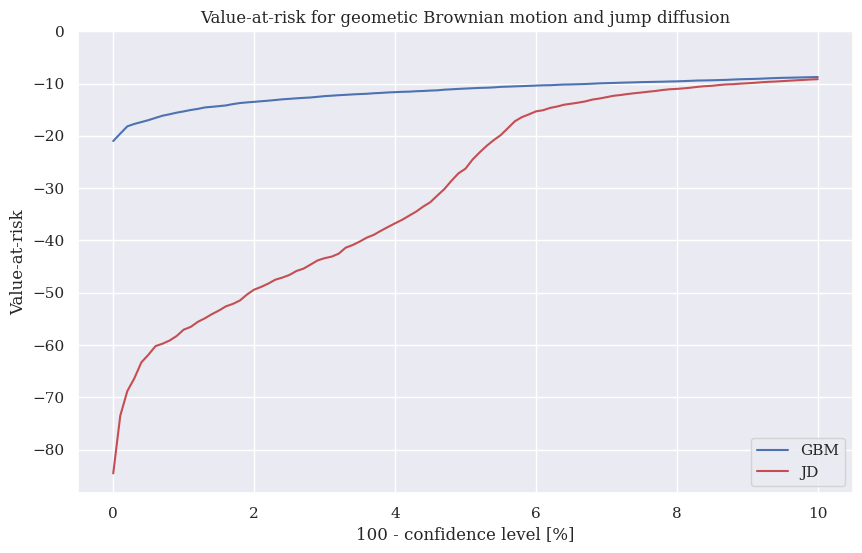

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.title('Value-at-risk for geometic Brownian motion and jump diffusion')
plt.xlabel('100 - confidence level [%]')
plt.ylabel('Value-at-risk')
plt.ylim(ymax=0.0)

### Credit Valusation Adjustments

Other important risk measures are the credit value-at-risk (CVaR) and the credit valuation adjustment (CVA), which is derived from the CVaR. CVaR is a measure for the risk resulting from the possibility that a counterparty might not be able to honor its obligations. There are two main assumptions to be made: the probability of default and the (average) loss level.

Consider the benchmark setup of Black-Scholes-Merton. In the simplest case, one consider a fixed probability $p$ of default (per year) of a counterparty. Using the Poisson distribution, default scenario are generated as follows, taking into account that a default can only occur once.

In [103]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1. 
I = 100000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))



In [105]:
L = 0.5     # defines the loss level
p = 0.01    # defines the probability of default
D = npr.poisson(p * T, I)   # simulates default events
D = np.where(D > 1, 1, D)   # limits defaults to one such event

In [106]:
# without defualt, the risk-neutral value of the future index level should be equal to the current value of asset today.
# The CVaR and the present value of the asset, adjusted for the credit risk, are given as follows.

math.exp(-r * T) * np.mean(ST)      # Discounted average simulated value of the asset at T

100.01231733971623

In [107]:
CVaR = math.exp(-r * T) * np.mean(L * D * ST)   # CVaR as the discounted average of the future losses in the case of default
CVaR

0.45143849616473936

In [109]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
# Discounted average simulated value of the asset at T, adjusted for the simulated losses from default. 
S0_CVA

99.56087884355149

In [110]:
S0_adj = S0 - CVaR      # current price of the asset adjusted by the simulated CVaR
S0_adj

99.54856150383526

In this particular simulation exmaple, one observes roughly 1,000 losses due to credit risk, which is to be expected given the assumed default probability of 1% and 100,000 simulated paths.

Figure below shows the complete frequency distribution of the losses due to a default.

In [112]:
np.count_nonzero(L * D * ST)    # number of default events and therewith loss events

914

(0.0, 175.0)

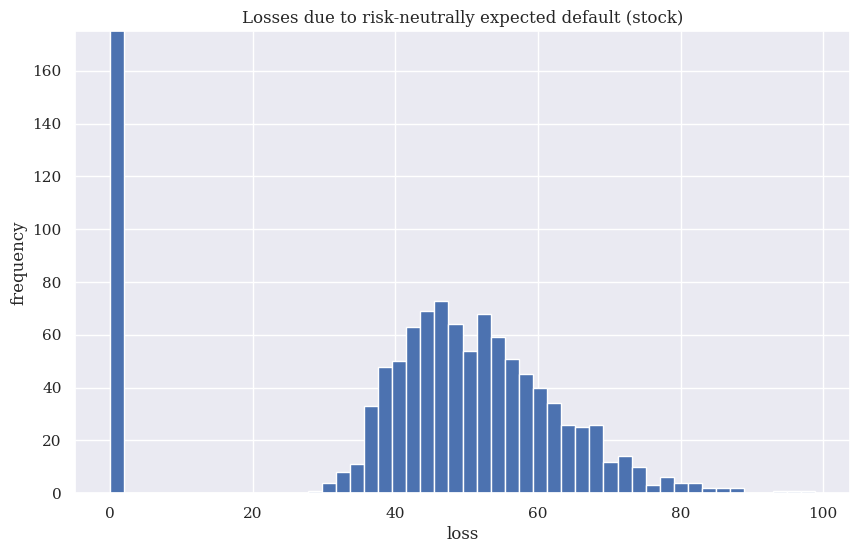

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * ST, bins=50)
plt.title('Losses due to risk-neutrally expected default (stock)')
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175)

Consider now the case of a European call option. Its value is about 10.4 currency units at a strike of 100. The CVaR is about 5 cents given the same assumptions with regard to probability of default and loss level.

In [114]:
K = 100. 
hT = np.maximum(ST - K, 0)
C0 = math.exp(-r * T) * np.mean(hT)     # The Monte Carlo estimator value for the European call option
C0

10.486399238691677

In [115]:
CVaR = math.exp(-r * T) * np.mean(L * D * hT)   # The CVaR as the discounted average of the future losses in the case of default
CVaR

0.046131495798808764

In [116]:
C0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * hT)   
# The Monte Carlo estimator value for the European call option
# adjusted for the simulated losses from default.
C0_CVA 

10.44026774289287

Compared to the case of a regular asset, the option case has somewhat different characteristics. One only sees a little more than 500 losses due to a default, although there are again 1,000 defaults in total. This results from the fact that the payoff of the option at maturity has a high probability of being zero.

In [117]:
np.count_nonzero(L * D * hT)        # The number of losses due to default

476

In [118]:
np.count_nonzero(D)     # The number of default

914

In [119]:
I - np.count_nonzero(hT)        # the number of cases for which the option expires worthless

43933

(0.0, 350.0)

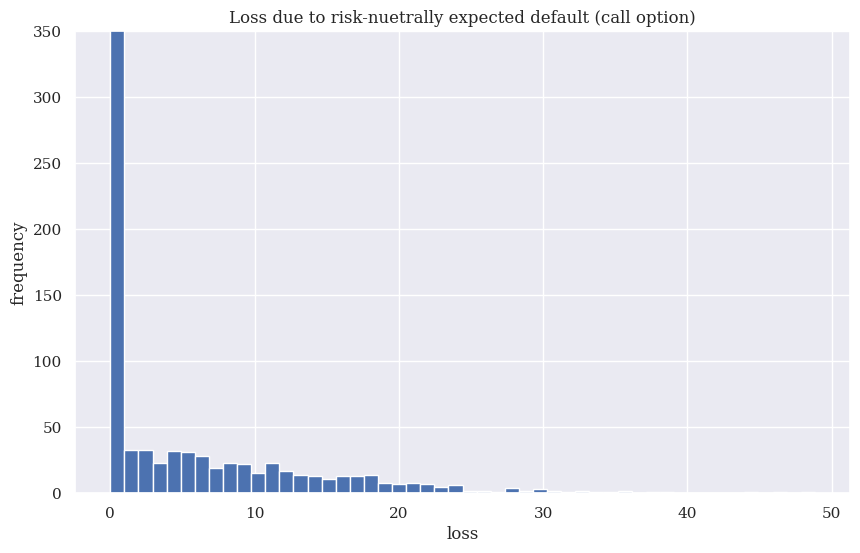

In [120]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * hT, bins=50)
plt.title('Loss due to risk-nuetrally expected default (call option)')
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=350)